# Data Analysis on Exercise 1

## load data set

In [1]:
import polars as pl

artvis_df = pl.read_csv(source='data/artvis_dump_NEW-semicolon.csv',has_header=True, separator=';',null_values=['\\N'])
artvis_df.head(10)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,str,str,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
1,"""William Bernard""","""Adeney""","""M""","""1878-01-01""","""1966-01-01""","""London""","""London""","""GB""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",4,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""","""1878-01-01""","""1966-01-01""","""London""","""London""","""GB""",618,"""Exhibition of the Camden Town …","""Public Art Galleries""",1913,"""group""",6,"""GB""","""Brighton""",50.833333,-0.15
1,"""William Bernard""","""Adeney""","""M""","""1878-01-01""","""1966-01-01""","""London""","""London""","""GB""",720,"""The Second Exhibition of Works…","""Goupil Gallery""",1915,"""group""",4,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""","""1878-01-01""","""1966-01-01""","""London""","""London""","""GB""",729,"""Third Exhibition of Works by M…","""Goupil Gallery""",1915,"""group""",5,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""","""1878-01-01""","""1966-01-01""","""London""","""London""","""GB""",650,"""The First Exhibition of Works …","""Goupil Gallery""",1914,"""group""",5,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""","""1878-01-01""","""1966-01-01""","""London""","""London""","""GB""",680,"""Twentieth Century Art. A Revie…","""Whitechapel Art Gallery""",1914,"""group""",3,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""","""1878-01-01""","""1966-01-01""","""London""","""London""","""GB""",724,"""Vorticist Exhibition""","""Doré Gallery""",1915,"""group""",1,"""GB""","""London""",51.514248,-0.093145
2,"""Peter""","""Alma""","""M""","""1886-01-01""","""1969-01-01""","""Medan""","""Amsterdam""","""NL""",716,"""Tentoonstelling Alma, Le Fauco…","""Rotterdamsche Kunstkring""",1915,"""group""",6,"""NL""","""Rotterdam""",51.916667,4.5
2,"""Peter""","""Alma""","""M""","""1886-01-01""","""1969-01-01""","""Medan""","""Amsterdam""","""NL""",490,"""Moderne Kunst Kring (Cercle de…","""Moderne Kunst Kring""",1912,"""group""",13,"""NL""","""Amsterdam""",52.35,4.916667


In [ ]:
import seaborn as sns

artvis_national = artvis_df.select('a.id', 'a.gender').group_by('a.id', 'a.gender').len().select('a.id', 'a.gender')
sns.countplot(data=artvis_national, x='a.gender')

In [19]:
artvis_df.select('a.id','a.nationality').group_by('a.id','a.nationality').len().group_by('a.nationality').len().sort('len',descending=True)

a.nationality,len
str,u32
null,2180
"""DE""",2006
"""FR""",1545
"""GB""",1236
"""IT""",1013
…,…
"""VE""",1
"""ME""",1
"""UY""",1


<Axes: xlabel='a.nationality', ylabel='len'>

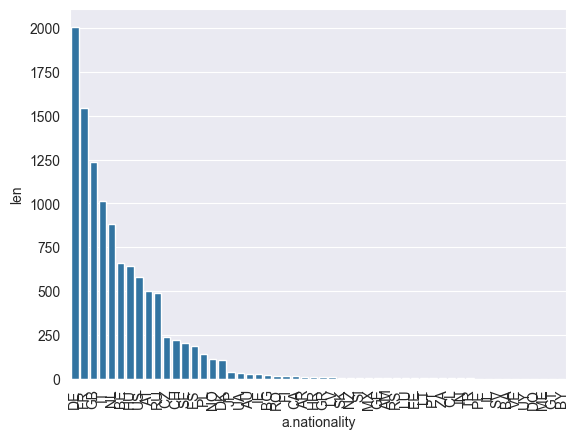

In [20]:
import matplotlib.pyplot as plt

artvis_national = artvis_df.select('a.id', 'a.nationality').group_by('a.id', 'a.nationality').len().group_by(
    'a.nationality').len().sort('len', descending=True)
plot = sns.barplot(data=artvis_national, x='a.nationality', y='len')
plt.setp(plot.get_xticklabels(), rotation=90)
plot
